In [1]:
import os
os.chdir('..')  #cd to project folder

import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import load_config

In [4]:
#load config file
config = load_config(path='config/config.yaml', section='lc-ms')

#impoer mzmine feature table
ftable = pd.read_csv(config['ftable_clean'])

#list of annotated compoudnds
piperamides = {"Piperlongumine (1)": 452,
    "Dihydropiperlongumine (2)": 463,
    "1-(3,4,5-Trimethoxycinnamoyl)piperidine (3)": 458,
    "1-(3,4,5-Trimethoxycinnamoyl)-3-piperideine (4)": 503,
    "3'-Demethoxypiperlongumine (5)": 406,
    "1-(3,4-Dimethoxycinnamoyl)piperidine (6)": 411,
    "Piperlongumine dimer (7)": 561,
    "Piperine (8)": 555}

bias = {"Higenamine (9)": 130,
    "Coclaurine (10)": 202,
    "Isococlaurine (11)": 270,
    "N-methylhigenamine (12)": 185,
    "N-dimethylhigenamine (13)": 123,
    "Norarmepavine (14)": 254,
    "Lotusine (15)": 161,
    "Magnocurarine (16)": 186,
    "N-methylarmepavine (17)": 227}

aporhpines = {"Asimilobine (18)": 279,
              "Lirinidine (19)": 298,
              "Magnoflorine (20)": 225}

piperolactams = {"Piperolactam A (21)": 403}

seco_bias = {"Cuspidatin (22)": 309,
             "Fimbriulatumine (21)": 315}

#merge dictionaries
all_alkaloids = {**piperamides, **bias, **aporhpines, **piperolactams, **seco_bias}

In [5]:
#prepare data
data = ftable.loc[ftable['feat_ID'].isin(all_alkaloids.values())] #select rows
data = data.loc[:, ['feat_ID', 'Leaf', 'Stem', 'Root']] #select columns
data['feat_ID'] = data['feat_ID'].map({v: k for k, v in all_alkaloids.items()}) #rename feat_ID to compound name
# data['feat_ID'] = pd.Categorical(data['feat_ID'], categories=all_alkaloids.keys(), ordered=True) #re-order rows
data = data.set_index('feat_ID').loc[all_alkaloids.keys()].reset_index() #re-order rows
data.set_index('feat_ID', inplace=True)
data = np.log10(data).replace(-np.inf, np.nan) #log-transform, replace -inf with 0

/opt/homebrew/Caskroom/mambaforge/base/envs/piperfim/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


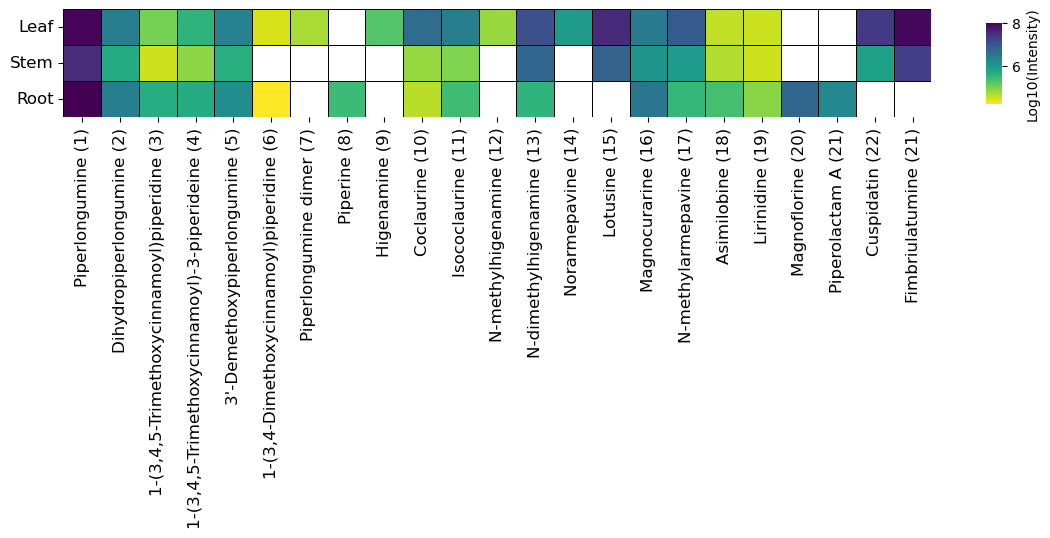

In [6]:
#heatmap horizontal
plt.figure(figsize=(14, 1.4))
data_t = data.T
sns.heatmap(data_t, cmap='viridis_r', fmt=".1f", yticklabels=True,
            linewidths=0.6, linecolor='black',
            cbar_kws={'label': 'Log10(Intensity)', 'orientation': 'vertical', 'pad': 0.05, 'shrink': 0.75, 'aspect': 5})
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12)
plt.xlabel(''), plt.ylabel('')
# plt.title(f'Inter-tissue alkaloids abundance', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y=1.01)
plt.savefig('figures/alkaloids_heatmap.svg', format='svg', bbox_inches='tight') #save as svg
plt.show()